# Molecular Solubility Classification using Machine Learning
This project predicts the solubility class of chemical compounds (Highly Soluble, Slightly Soluble, Insoluble) based on key molecular descriptors such as **Molecular Weight, LogP, Hydrogen Bond Donors/Acceptors, and Polar Surface Area**.  
We implement **Logistic Regression** for baseline performance and a **Decision Tree** for interpretability, highlighting the molecular features that drive solubility behavior..

In [41]:
# Step 1: Load dataset
import pandas as pd
df = pd.read_csv("chemical_compound_solubility.csv")

print(df.head())

   MolecularWeight      LogP  HydrogenBondDonors  HydrogenBondAcceptors  \
0       218.543053  7.082659                   4                      5   
1       477.821438  0.395619                   3                      0   
2       379.397274 -0.551051                   5                      0   
3       319.396318  2.894528                   2                      5   
4       120.208388  7.856505                   3                      3   

   PolarSurfaceArea  Solubility_gL             Class  
0        139.485043       1.693141  Slightly Soluble  
1         52.888722      13.057913    Highly Soluble  
2        110.403446      14.406702    Highly Soluble  
3         29.806491       5.864260  Slightly Soluble  
4         41.608006       1.846549  Slightly Soluble  


In [42]:
df.shape # rows/columns

(150, 7)

In [43]:
#  Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 MolecularWeight          0
LogP                     0
HydrogenBondDonors       0
HydrogenBondAcceptors    0
PolarSurfaceArea         0
Solubility_gL            0
Class                    0
dtype: int64


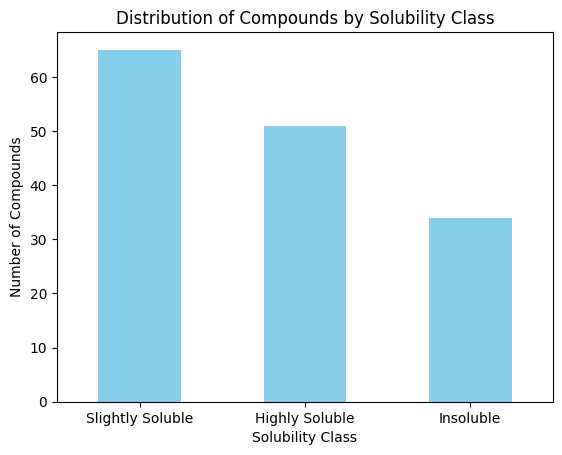

In [44]:
# Visualize the distribution of compounds across solubility classes
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target classes
df['Class'].value_counts().plot.bar(color='skyblue')
plt.title("Distribution of Compounds by Solubility Class")
plt.xlabel("Solubility Class")
plt.ylabel("Number of Compounds")
plt.xticks(rotation=0)
plt.show()

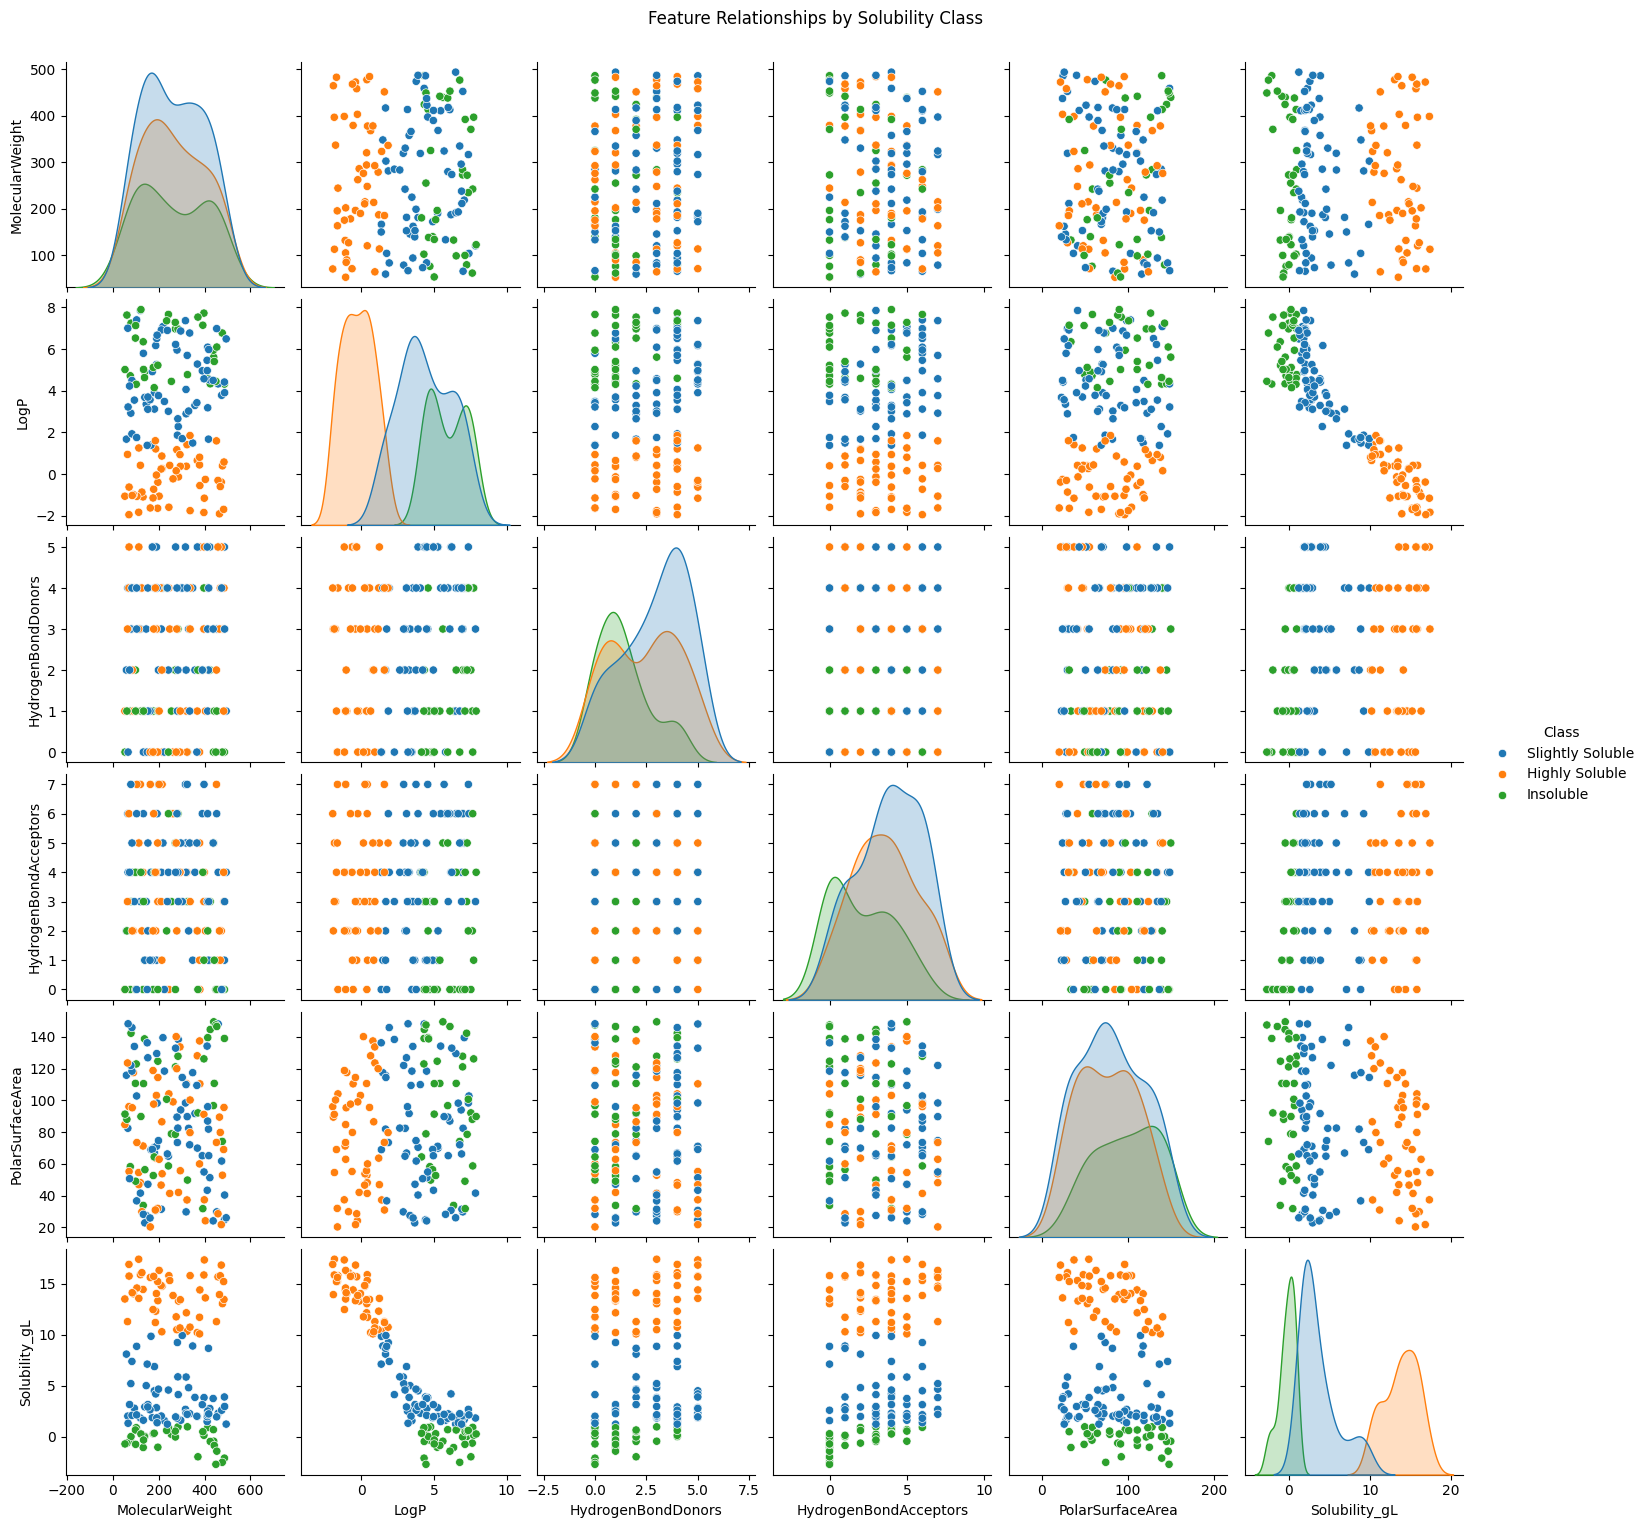

In [45]:
# Pairplot to visualize feature separation
sns.pairplot(df, hue="Class", diag_kind="kde")
plt.suptitle("Feature Relationships by Solubility Class", y=1.02)
plt.show()

In [46]:
# Prepare features and target
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
# Features (X) and target (y)
X = df[['MolecularWeight', 'LogP', 'HydrogenBondDonors',
        'HydrogenBondAcceptors', 'PolarSurfaceArea']]
y = df['Class']

In [48]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
# Scale features for Logistic Regression:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Train models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred1 = log_reg.predict(X_test_scaled)

In [52]:
# Decision Tree
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

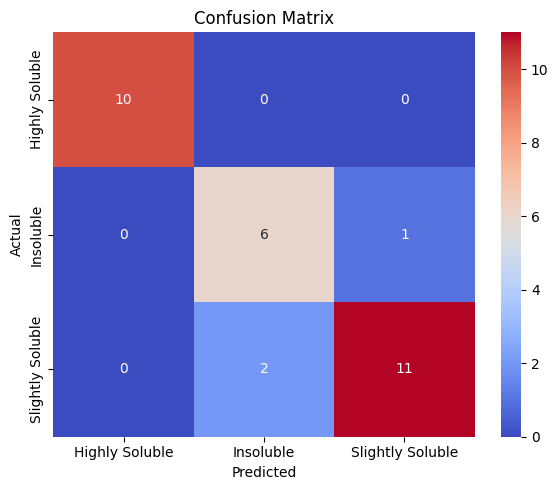

In [57]:
# Confusion Matrix
y_pred_labels = le.inverse_transform(y_pred) # Convert predictions to original class labels
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [58]:
#  Evaluate models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
print("\nModel Evaluation:\n")
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred1))
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred2))


Model Evaluation:

Accuracy (Logistic Regression): 0.8666666666666667
Accuracy (Decision Tree): 0.8


In [60]:
print("\nClassification Report (Decision Tree):\n")
print(classification_report(y_test, y_pred2))


Classification Report (Decision Tree):

                  precision    recall  f1-score   support

  Highly Soluble       1.00      1.00      1.00        10
       Insoluble       0.55      0.86      0.67         7
Slightly Soluble       0.89      0.62      0.73        13

        accuracy                           0.80        30
       macro avg       0.81      0.82      0.80        30
    weighted avg       0.85      0.80      0.80        30



In [61]:
# Feature importance (Decision Tree)

importances = clf.feature_importances_
features = X.columns

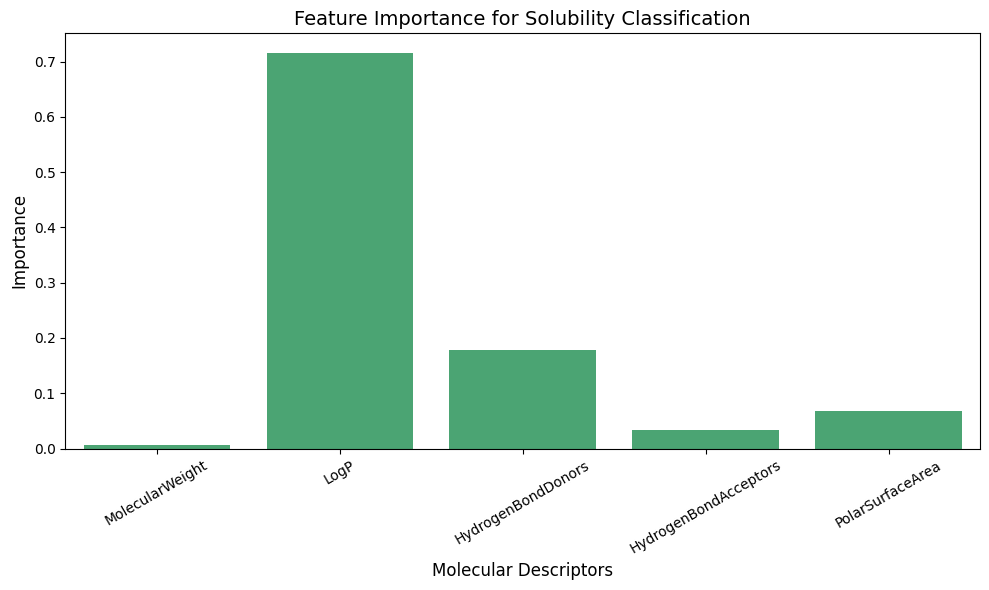

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x=features, y=importances, color='mediumseagreen')
plt.title('Feature Importance for Solubility Classification', fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Molecular Descriptors', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

***Conclusion***
Decision Tree and Logistic Regression models successfully classified compounds by solubility.  
Key molecular descriptors like **LogP** and **Polar Surface Area** drive solubility, offering interpretable chemical insights for molecular design.